In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#import data for EMS dispatch
dispatch = pd.read_csv("dispatch.csv")
dispatch.head(10)

,_id,call_id_hash,service,priority,priority_desc,call_quarter,call_year,description_short,city_code,city_name,geoid,census_block_group_center__x,census_block_group_center__y
0,144723,2955BC792F8B92F8FD9FE3F584B5BA,EMS,E4,EMS Basic Life Support Assistance response (i....,Q3,2017,FALL,PLU,PLUM,4.200353e+14,-79.752593,40.502421
1,151745,29561B6AD51835CC5AC752494B9487,EMS,E1,EMS Advanced Life Support life threatening res...,Q1,2019,COMMERCIAL OR APARTMENT BLDG FIRE,ROB,ROBINSON,4.200346e+14,-80.154862,40.449953
2,131978,29567A7685BEB9CBA0C2C5B30E34C7,EMS,E1,EMS Advanced Life Support life threatening res...,Q4,2015,Removed,WAL,WALL,4.200356e+14,-79.795608,40.393102
3,58384,1414B98989453343A346783E072082,EMS,E1,EMS Advanced Life Support life threatening res...,Q3,2015,FALL,MCC,MCCANDLESS,4.200341e+14,-80.038333,40.598527
4,69787,141CDCBE37BB6A042477630662BA70,EMS,E5,All administrative mark outs,Q1,2017,NON EMERGENCY TRANSPORT,KEN,KENNEDY,4.200346e+14,-80.091333,40.472944
5,1,000015F42010D7E9BFD0478A34A274,EMS,E4,EMS Basic Life Support Assistance response (i....,Q2,2019,FALL,WBG,WILKINSBURG,4.200356e+14,-79.863292,40.452594
6,238,0000345640698E7FCCB2D4C9B2DE00,EMS,E2,EMS Standard Advanced Life Support response,Q4,2019,TRAFFIC - UNKNOWN STATUS,DUQ,DUQUESNE,4.200349e+14,-79.862936,40.383477
7,1553707,000044E125FBFDEACFCF8872A47C4C,EMS,E2,EMS Standard Advanced Life Support response,Q4,2022,INACCESS INC-PERIPHERAL ENTRAP,PGH,PITTSBURGH,4.200356e+14,-79.953685,40.453912
8,278,0000971292DCDD81F23EEBB990BD84,EMS,E0,EMS Advanced Life Support life threatening res...,Q4,2018,"GUNSHOT, STABBING, OR OTHER WOUND",PGH,PITTSBURGH,4.200313e+14,-79.886054,40.453670
9,1553708,00010B28D021001012C6CD9C2ADABA,EMS,E5,All administrative mark outs,Q4,2022,NON EMERGENCY TRANSPORT,PGH,PITTSBURGH,4.200304e+14,-79.962061,40.440680


Text(0, 0.5, 'Amount')

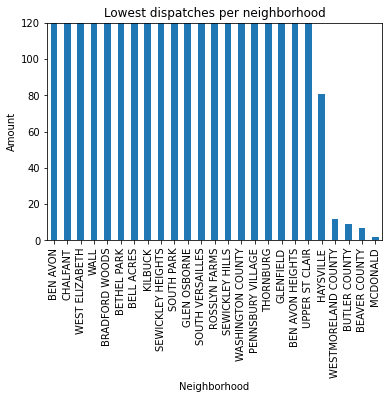

In [5]:
# Get data related to EMS dispatches within certain neighborhoods, then plot that data
rates = dispatch['city_name'].value_counts()
rates.tail(25).plot(kind="bar", ylim=[0,120])
plt.title("Lowest dispatches per neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")

In [7]:
#import data for fire dispatch
dispatchFire = pd.read_csv("fireDispatch.csv")
dispatchFire.head(10)

,_id,call_id_hash,service,priority,priority_desc,call_quarter,call_year,description_short,city_code,city_name,geoid,census_block_group_center__x,census_block_group_center__y
0,39,00084FFABEB1161D454BB9786A1E32,Fire,Q0,EMS ALS life threatening response w/ backup,Q4,2017,TRAFFIC-HIGH MECHANISM (BIKE/MOTORCYCLE),PGH,PITTSBURGH,4.200314e+14,-79.920774,40.448280
1,29,0005D33B4FB45C06ABB5B5CBF650D2,Fire,F2,Incidents actively occurring or that has just ...,Q1,2020,Removed,BKR,BRACKENRIDGE,4.200340e+14,-79.749710,40.608054
2,471407,0005EF3A70C29534A143B5612D2FD2,Fire,Q0,EMS ALS life threatening response w/ backup,Q2,2020,Removed,EWD,EDGEWOOD,4.200352e+14,-79.884314,40.434803
3,122,00064937D69052FE0D85A37D099C6B,Fire,F2,Incidents actively occurring or that has just ...,Q1,2019,FIRE ALARM COM BLDG,PGH,PITTSBURGH,4.200305e+14,-79.963119,40.446819
4,635784,00065838FC934C7501AA97A776D8EE,Fire,Q0,EMS ALS life threatening response w/ backup,Q3,2022,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200308e+14,-79.946187,40.454170
5,43,000ABE8C2115D193F33E4EFD5EE94A,Fire,F2,Incidents actively occurring or that has just ...,Q2,2019,CONTAINMENT/CLEAN UP DETAIL,FPB,FRANKLIN PARK,4.200341e+14,-80.087444,40.604405
6,40,0008793A4CA86112149D5F917E0A6E,Fire,F2,Incidents actively occurring or that has just ...,Q4,2018,CO OR HAZMAT ISSUE,CAR,CARNEGIE,4.200347e+14,-80.084492,40.401765
7,503656,00087F35293C3E18ADAC9DBDFB2A8A,Fire,Q0,EMS ALS life threatening response w/ backup,Q4,2020,EMS CALL/ASSIST,PGH,PITTSBURGH,4.200326e+14,-80.016297,40.464267
8,869,000AC0C9989743759C8E0826FEC7E9,Fire,Q1,EMS ALS life threatening response,Q1,2015,Removed,BEL,BELLEVUE,4.200343e+14,-80.055426,40.498136
9,140,000C6E8AF23337579EF5696F72B9A4,Fire,F0,Immediate threat to life safety.,Q4,2019,TRAFFIC - NOT ALERT,MCC,MCCANDLESS,4.200341e+14,-80.024953,40.557640


Text(0, 0.5, 'Amount')

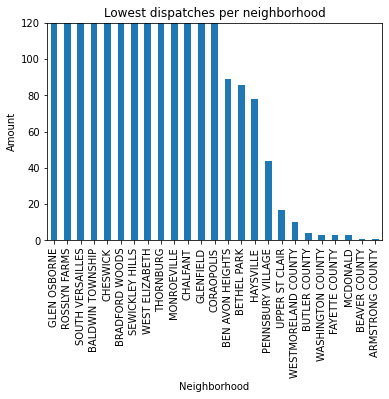

In [8]:
# Get data related to EMS dispatches within certain neighborhoods, then plot that data
rates = dispatchFire['city_name'].value_counts()
rates.tail(25).plot(kind="bar", ylim=[0,120])
plt.title("Lowest dispatches per neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Amount")